In [12]:
import pandas as pd
import numpy as np
FF6 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/FF6reviews_data.csv')
print(FF6.shape, '\n')
print(FF6.dtypes, '\n')

(574, 5) 

Rating         object
Title          object
Content        object
Author Name    object
Date           object
dtype: object 



In [18]:
FF6_clean = FF6

FF6_clean['Date'] = pd.to_datetime(FF6_clean['Date'], format = 'mixed')
sample = FF6_clean['Date'].dt.year
FF6_clean['Year'] = sample
#FF5_clean

print(FF6_clean["Year"].isnull().sum())
FF6_clean

0


,Rating,Title,Content,Author Name,Date,Year
0,8,"""This is vehicular warfare.""",I don't think many other franchises has been a...,Al_The_Strange,2013-05-24,2013
1,8,A big movie and a fun time!,"Well, this was unexpected! Going into this fil...",pablo2896,2013-05-24,2013
2,8,BEASTLY,No content,FeastMode,2019-06-25,2019
3,No rating,Builds Upon The Winning Blockbuster Formula Of...,The sixth instalment in The Fast and the Furio...,CinemaClown,2015-09-04,2015
4,7,Movin' on up!,While most franchises lose their steam with ea...,moviewizguy,2013-05-16,2013
...,...,...,...,...,...,...
569,No rating,"I saw it for Paul Walker, after his untimely d...",No content,TxMike,2014-06-08,2014
570,No rating,All Roads lead to this.,Fast and Furious 6.Well the movie carries one ...,bluesman-20,2013-12-18,2013
571,No rating,Exciting mechanics,"We don't watch these for the superb insights, ...",chaos-rampant,2013-07-21,2013
572,No rating,"fast6, then a 7?","Okay when the original ""fast and the furious"" ...",hawaiiwarrior08,2013-06-23,2013


<Axes: xlabel='Year', ylabel='Count'>

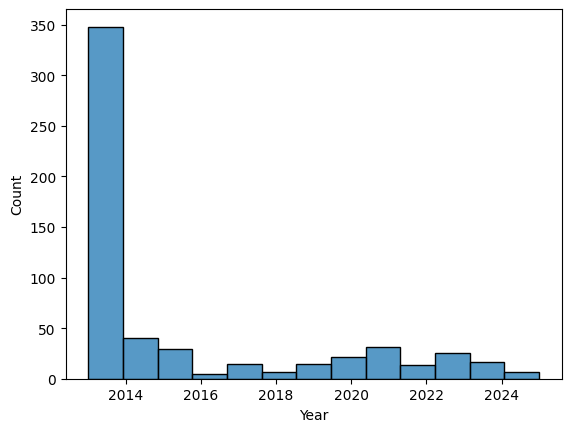

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(FF6_clean['Year'])

In [20]:
FF6_clean['Rating'] = pd.to_numeric(FF6_clean['Rating'], errors='coerce')
print(FF6.dtypes, '\n')
print(FF6_clean["Rating"].isnull().sum())
print(FF6_clean["Title"].isnull().sum())

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int32
dtype: object 

17
0


In [28]:
FF6_clean2013 = FF6_clean.loc[(FF6_clean["Year"] == 2013)]
FF6_clean_dec = FF6_clean.loc[(FF6_clean["Year"] >= 2023) & (FF6_clean["Year"] < 2025)]


print(FF6_clean2013["Rating"].isnull().sum())
missing_val = FF6_clean2013['Rating'].median()
FF6_clean2013['Rating'] = FF6_clean2013['Rating'].fillna(missing_val)
print(FF6_clean2013["Rating"].isnull().sum())
FF6_clean2013

FF6_clean2013['Rating'].unique()

FF6_clean2 = pd.concat([FF6_clean2013, FF6_clean_dec])
print(FF6_clean2["Rating"].isnull().sum())




10
0
0


/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_1863/2834107723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FF6_clean2013['Rating'] = FF6_clean2013['Rating'].fillna(missing_val)


In [30]:
FF6_clean2
FF6_clean2['Content'] = FF6_clean2["Content"].str.replace('No content', "Nan")


count3 = FF6_clean2['Content'] == "NaN"
count3.value_counts()
print(FF6_clean2["Content"].isna().sum())

FF6_clean2

0


,Rating,Title,Content,Author Name,Date,Year
0,8.0,"""This is vehicular warfare.""",I don't think many other franchises has been a...,Al_The_Strange,2013-05-24,2013
1,8.0,A big movie and a fun time!,"Well, this was unexpected! Going into this fil...",pablo2896,2013-05-24,2013
4,7.0,Movin' on up!,While most franchises lose their steam with ea...,moviewizguy,2013-05-16,2013
6,7.0,"As if a Tank wasn't enough, they got a Plane too",Fast & Furious over the last few installments ...,KrazzyDJ,2013-05-26,2013
8,6.0,Indeed a guy's movie...,The faster the cars in this franchise seem to ...,paul_haakonsen,2013-09-01,2013
...,...,...,...,...,...,...
532,5.0,Like every other boring action movie of this d...,Nan,alexanderpratl,2024-09-15,2024
540,5.0,Hey I liked the last one but can we settle dow...,"Nonsensical action is straight ahead, and we'r...",H4wke,2024-11-06,2024
541,5.0,Furious 6 (2013) Wear starting,The biggest problem with Fast and Furious 6 is...,claszdsburrogato,2024-01-11,2024
548,4.0,A low point of the series,I had to write this review because I couldn't ...,blightersaurus,2024-09-16,2024


In [31]:
FF6_clean2['Content'] = FF6_clean2["Title"].str.replace('No Title', "Nan")
count4 = FF6_clean2['Title'] == "NaN"
count4.value_counts()

Title
False    390
Name: count, dtype: int64